# Assignment 2: Milestone I Natural Language Processing

<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Task 1. Text Pre-processing</strong></h3>

#### Student Name: Tran Ngoc Anh Thu
#### Student ID: s3879312

Date: "October 2, 2022"

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: 
* sklearn
* collections
* re
* numpy
* nltk
* itertools
* pandas
* os

## Steps
1. Load data
2. Basic Text Pre-processing
    * Sentence Segmentation
    * Word Tokenization
    * Removing Single Character Tokens
    * Removing Stop words
3. Summary
4. References

## Introduction
Nowadays there are many job hunting websites including seek.com.au and au.indeed.com. These job hunting sites all manage a job search system, where job hunters could search for relevant jobs based on keywords, salary, and categories. In previous years, the category of an advertised job was often manually entered by the advertiser (e.g., the test_indexloyer). There were mistakes made for category assignment. As a result, the jobs in the wrong class did not get enough exposure to relevant candidate groups.
With advances in text analysis, automated job classification has become feasible; and sensible suggestions for job categories can then be made to potential advertisers. This can help reduce human data entry error, increase the job exposure to relevant candidates, and also improve the user experience of the job hunting site. In order to do so, we need an automated job ads classification system that helps to predict the categories of newly entered job advertisements.

NLP uses a hierarchy to determine which groups of words and sentences belong to each other. The smallest level of text is a token which can be a sentence or an individual word. A group of tokens is called a document, for instance each text file containing job description. A group of documents is called a corpus, in this case the job category folder which containng several job adverisement files inside . Finally, a group of corpus is called a corpora, which can be several job categories we wish to compare and evaluate.

In this **task1** notebook, we are going to explore a job advertisement data set, and focus on pre-processing the description only.
In the next task **task2_3**, we will then use the pre-processed text reviews to generate data features and build classification models to predict label of the description.

## Dataset
+ A small collection of job advertisement documents (around 776 jobs) inside the `data` folder.
+ Inside the data folder, there are four different sub-folders: Accounting_Finance, Engineering, Healthcare_Nursing, and Sales, representing a job category.
+ The job advertisement text documents of a particular category are in the corresponding sub-folder.
+ Each job advertisement document is a txt file named `Job_<ID>.txt`. It contains the title, the webindex (some will also have information on the company name, some might not), and the full description of the job advertisement.



## Importing libraries 

In [29]:
import nltk
nltk.download('punkt')

# import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_files
from collections import Counter
from nltk import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from itertools import chain
import re
import os

plt.rcParams["figure.figsize"] = (20,10)

[nltk_data] Downloading package punkt to /Users/s3879312/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


NameError: name 'plt' is not defined

In [2]:
# check the version of the main packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.21.5
Pandas version:  1.4.2
Python 3.9.12


<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>1.1 Examining and loading data</strong></h3>

- Examine the data folder, including the categories and job advertisment txt documents, etc. Explain your findings here, e.g., number of folders and format of txt files, etc.
- Load the data into proper data structures and get it ready for processing.
- Extract webIndex and description into proper data structures.



Before doing any pre-processing, we need to load the data into a proper format. 
To load the data, you have to explore the data folder. Inside the `data` folder:
+ Inside the data folder you will see 4 different subfolders, namely: `Accounting_Finance`, `Engineering`,`Healthcare_Nursing`, and `Sales`, each folder name is a job category.
+ The job advertisement text documents of a particular category are located in the corresponding subfolder.
+ Each job advertisement document is a txt file, named as "Job_<ID>.txt". It contains the title, the webindex,(some will also have information on the company name, some might not), and the full description of the job advertisement. 

In this case, providing that the dataset is given in a very well organised way, I would use a super handy API [`load_files`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_files.html) from `sklearn.datasets`. 
    
**import the function by:**
```python
from sklearn.datasets import load_files  
```

Then you can use the function to directly load the data and labels, for example:
```python
df = load_files(r"data")  
```

The loaded `data` is then a dictionary, with the following attributes:

| **ATTRIBUTES**   | **DESCRIPTION**                                           |
|--------------|---------------------------------------------------------------|
| Webindex     | 8 digit Id of the job advertisement on the website            |
| Title        | Title of the advertised job position                          |
| Company      | Company (test_indexloyer) of the advertised job position             |
| Description  | the description of each job advertisement                     |
| Category     | The category of the advertised job position                   |


- Examine the data folder, including the categories and job advertisment txt documents, etc. Explain your findings here, e.g., number of folders and format of txt files, etc.
- Load the data into proper data structures and get it ready for processing.
- Extract webIndex and description into proper data structures.


In [3]:
# load each folder and file inside the data folder
df = load_files(r"data")
# type of the loaded file
print(f'Data type of the loaded data and labels using sklearn API: {type(df)}')

Data type of the loaded data and labels using sklearn API: <class 'sklearn.utils.Bunch'>


In [4]:
df['target'] # this corresponding to the index value of the 4 categories

array([0, 0, 2, 0, 2, 1, 2, 0, 3, 3, 0, 0, 1, 3, 1, 3, 3, 1, 3, 2, 2, 2,
       3, 3, 0, 2, 2, 2, 0, 2, 3, 1, 2, 0, 1, 3, 3, 1, 1, 0, 2, 2, 2, 2,
       0, 0, 2, 1, 3, 1, 1, 2, 2, 3, 0, 0, 1, 0, 2, 2, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 1, 3, 2, 2, 1, 0, 1, 1, 1,
       3, 0, 3, 1, 3, 2, 2, 0, 2, 3, 2, 1, 0, 1, 1, 2, 0, 3, 0, 1, 3, 2,
       1, 2, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3,
       2, 0, 0, 1, 3, 2, 0, 1, 0, 3, 1, 2, 1, 0, 0, 0, 3, 0, 1, 2, 3, 1,
       1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2, 0, 2, 3, 2, 2, 0, 2,
       1, 0, 1, 1, 1, 3, 1, 3, 1, 0, 3, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1, 3,
       0, 1, 1, 3, 0, 1, 0, 2, 3, 0, 2, 0, 1, 0, 1, 3, 1, 0, 1, 1, 0, 1,
       0, 1, 2, 1, 3, 1, 2, 3, 1, 1, 2, 0, 0, 1, 2, 0, 3, 2, 3, 2, 2, 3,
       0, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 0, 0, 2, 1, 2, 2, 2, 2, 1, 3, 1,
       2, 1, 2, 3, 2, 3, 0, 1, 3, 0, 2, 1, 0, 2, 1, 2, 0, 2, 1, 1, 1, 2,
       2, 1, 2, 0, 2, 2, 1, 2, 0, 1, 0, 0, 3, 2, 1,

In [5]:
# Name of the categories
df['target_names'] # this corresponding to the name value of the 4 categories

['Accounting_Finance', 'Engineering', 'Healthcare_Nursing', 'Sales']

In [6]:
# loop through the index of the target_names and print the category name
for i in range(len(df['target_names'])):
    print(f'Category at index {i}: {df["target_names"][i]}')

Category at index 0: Accounting_Finance
Category at index 1: Engineering
Category at index 2: Healthcare_Nursing
Category at index 3: Sales


**Create temporary variable and assign a number for testing at that index**

`test_index` is a number to test whether the attribute at that position matches the desired outputs. So we don't need to print to whole lengthly output each test and void memory problems

In [7]:
test_index = 20 # an example to test for the whole task outputs.

df['filenames'][test_index], df['target'][test_index] 

('data/Healthcare_Nursing/Job_00491.txt', 2)

### --------------> OBSERVATION
from the file path and the label we know that it's the correct label too

In [8]:
# assign variables
full_description, category, directory = df.data, df.target, df.filenames

# the test_index job advertisement description
print(f'Job description: {full_description[test_index]}\n\nCorresponding to the label {category[test_index]} inside the {directory[test_index]} directory')

Job description: b'Title: PERM Unit Mgr RGN Kid minster Flexi ****K due\nWebindex: 71692209\nDescription: Job Title: Unit Manager Reporting to: Registered Manager Job Purpose: To manage in a professional manner the day to day running of the home\xe2\x80\x99s administration, clinical policies and procedures, training and care planning. To implement working practices that monitors the health and welfare of the home\xe2\x80\x99s service users and staff and their respective environments. To promote quality care within a warm friendly ambience. Key Result Areas Managing To work with the Directors to achieve the home\xe2\x80\x99s financial targets. To manage the home in a manner which will not bring the home or service users into disrepute. To maintain confidentiality on all aspects of care and staff management. To ensure all the home\xe2\x80\x99s policies and procedures are implemented and followed by all staff. To inform the Registered Manager immediately if a serious difficulty or event o

### ------> OBSERVATION:
As we can see the current description is in the **binary** form and read as a byte object (a `b` in front of each review text if you print it out). Therefore, we need to decode into normal string for further pre-processing

However, the tokenizer cannot apply a string pattern on a bytes-like object. To resolve this, we decode each read `full_description` text using `utf-8` by writing a decode function

### Decode the description

In [9]:
def decode(l):
    if isinstance(l, list):
        return [decode(x) for x in l]
    else:
        return l.decode('utf-8')

# decode the binary description into utf-8 form and save it to full_description
full_description = decode(full_description)
full_description[test_index]

'Title: PERM Unit Mgr RGN Kid minster Flexi ****K due\nWebindex: 71692209\nDescription: Job Title: Unit Manager Reporting to: Registered Manager Job Purpose: To manage in a professional manner the day to day running of the home’s administration, clinical policies and procedures, training and care planning. To implement working practices that monitors the health and welfare of the home’s service users and staff and their respective environments. To promote quality care within a warm friendly ambience. Key Result Areas Managing To work with the Directors to achieve the home’s financial targets. To manage the home in a manner which will not bring the home or service users into disrepute. To maintain confidentiality on all aspects of care and staff management. To ensure all the home’s policies and procedures are implemented and followed by all staff. To inform the Registered Manager immediately if a serious difficulty or event occurs. Managing Support To delegate responsibility effectively

### ---------------> OBSERVATION:
The current `full_description` contains these attributes:

| **ATTRIBUTES**   | **MEANING**                                        |
|--------------|----------------------------------------------------|
| Webindex     | 8 digit Id of the job advertisement on the website |
| Title        | Title of the advertised job position               |
| Company      | Company (test_indexloyer) of the advertised job position  |
| Description  | the description of each job advertisement          |

I only want the description to perform text-preprocessing in task 1 and other attributes for further exploring different features of a job advertisement, e.g., the title in task 3, to test the accuracy. Therefore, I will extract each above attribute inside the `full_description`

<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>1.2 Pre-processing</strong></h3>

1. Extract information from each job advertisement. Perform the following pre-processing steps to the description of each job advertisement;
2. Tokenize each job advertisement description. The word tokenization must use the following regular expression, `r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?"`;
3. All the words must be converted into the lower case;
4. Remove words with length less than 2.
5. Remove stopwords using the provided stop words list (i.e, stopwords_en.txt). It is located inside the
same downloaded folder.
6. Remove the word that appears only once in the document collection, based on term frequency.
7. Remove the top 50 most frequent words based on document frequency.
8. Save all job advertisement text and information in txt file(s) (you have flexibility to choose what format
you want to save the preprocessed job ads, and you will need to retrieve the pre-processed job ads
text in Task 2 & 3);
9. Build a vocabulary of the cleaned job advertisement descriptions, save it in a txt file (please refer to the
required output);

## 1.2.1 Extract information from each job advertisement

In [10]:
# Extract description, title, webindex,  from each job advertisement and test using test_index

# Extract description
def extract_description(full_description):
    description = [re.search(r'\nDescription: (.*)', str(i)).group(1) for i in full_description]
    return description
description = extract_description(full_description)
print(f'Job description at index {test_index}:\n{description[test_index]}\n')

# Extract title
def extract_title(full_description):
    title = [re.search(r'Title: (.*)', str(i)).group(1) for i in full_description]
    return title
title = extract_title(full_description)
print(f'Job title at index {test_index}:\n{title[test_index]}\n')

# Extract webindex
def extract_webindex(full_description):
    webindex = [re.search(r'Webindex: (.*)', str(i)).group(1) for i in full_description]
    return webindex
webindex = extract_webindex(full_description)
print(f'Job webindex at index {test_index}:\n{webindex[test_index]}\n')

# Extract company
def extract_company(company):
    company = [re.search(r'Company: (.*)', str(i)).group(1) if re.search(r'Company: (.*)', str(i)) else "NA" for i in company]
    return company
company = extract_company(full_description)
print(f'Job company at index {test_index}:\n{company[test_index]}\n')

Job description at index 20:
Job Title: Unit Manager Reporting to: Registered Manager Job Purpose: To manage in a professional manner the day to day running of the home’s administration, clinical policies and procedures, training and care planning. To implement working practices that monitors the health and welfare of the home’s service users and staff and their respective environments. To promote quality care within a warm friendly ambience. Key Result Areas Managing To work with the Directors to achieve the home’s financial targets. To manage the home in a manner which will not bring the home or service users into disrepute. To maintain confidentiality on all aspects of care and staff management. To ensure all the home’s policies and procedures are implemented and followed by all staff. To inform the Registered Manager immediately if a serious difficulty or event occurs. Managing Support To delegate responsibility effectively and within legal boundaries. To ensure through clinical st

## 1.2.2 + 1.2.3 
## Tokenize description using regular expression & lowercase all words

In [11]:
def tokenizeDescription(raw_description):
    """
        This function first convert all words to lowercases,
        it then segment the raw description into sentences and tokenize each sentences
        and convert the description to a list of tokens.
    """
    description = raw_description.lower() # convert all words to lowercase

    # segment into sentences
    sentences = sent_tokenize(description)

    # tokenize each sentence
    pattern = r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?"
    tokenizer = RegexpTokenizer(pattern)
    token_lists = [tokenizer.tokenize(sen) for sen in sentences]

    # merge them into a list of tokens
    tokenised_description = list(chain.from_iterable(token_lists))
    return tokenised_description

tk_description = [tokenizeDescription(r) for r in description]  # list comprehension, generate a list of tokenized articles

print("Raw description:\n",description[test_index],'\n')
print("Tokenized description:\n",tk_description[test_index],'\n\n')
print("The original number of Tokenized description tokens: ",len(tk_description))

Raw description:
 Job Title: Unit Manager Reporting to: Registered Manager Job Purpose: To manage in a professional manner the day to day running of the home’s administration, clinical policies and procedures, training and care planning. To implement working practices that monitors the health and welfare of the home’s service users and staff and their respective environments. To promote quality care within a warm friendly ambience. Key Result Areas Managing To work with the Directors to achieve the home’s financial targets. To manage the home in a manner which will not bring the home or service users into disrepute. To maintain confidentiality on all aspects of care and staff management. To ensure all the home’s policies and procedures are implemented and followed by all staff. To inform the Registered Manager immediately if a serious difficulty or event occurs. Managing Support To delegate responsibility effectively and within legal boundaries. To ensure through clinical standards and

#### A Few Statistics Before Any Further Pre-processing

In the following, we are interested to know a few statistics at this very begining stage, including:
* The total number of tokens across the corpus
* The total number of types across the corpus, i.e. the size of vocabulary 
* The so-called, [lexical diversity](https://en.wikipedia.org/wiki/Lexical_diversity), referring to the ratio of different unique word stems (types) to the total number of words (tokens).  
* The average, minimum and maximum number of token (i.e. document length) in the dataset.

In the following, we wrap all these up as a function, since we will use this printing module later to compare these statistic values before and after pre-processing.

In [12]:
def stats_print(tk_description):
    words = list(chain.from_iterable(tk_description)) # we put all the tokens in the corpus in a single list
    vocab = set(words) # compute the vocabulary by converting the list of words/tokens to a set, i.e., giving a set of unique words
    lexical_diversity = len(vocab)/len(words)
    print("Vocabulary size: ",len(vocab))
    print("Total number of tokens: ", len(words))
    print("Lexical diversity: ", lexical_diversity)
    print("Total number of description:", len(tk_description))
    lens = [len(article) for article in tk_description]
    print("Average description length:", np.mean(lens))
    print("Maximum description length:", np.max(lens))
    print("Minimum description length:", np.min(lens))
    print("Standard deviation of description length:", np.std(lens))

stats_print(tk_description)

Vocabulary size:  9834
Total number of tokens:  186952
Lexical diversity:  0.052601737344345076
Total number of description: 776
Average description length: 240.91752577319588
Maximum description length: 815
Minimum description length: 13
Standard deviation of description length: 124.97750685071483


## Task 1.2.4 Remove words with length less than 2.
remove any token that only contains a single character (a token that of length less than 2).

In [13]:
words = list(chain.from_iterable(tk_description)) # we put all the tokens in the corpus in a single list
word_counts = Counter(words) # count the number of times each word appears in the corpus
print("Before removing, the number of words that appear with length less than 2:", len([w for w in word_counts if word_counts[w] < 2]))

# filter out single character tokens
tk_description = [[w for w in description if len(w) >=2] \
                      for description in tk_description]

words = list(chain.from_iterable(tk_description)) # we put all the tokens in the corpus in a single list
word_counts = Counter(words) # count the number of times each word appears in the corpus
print("After removing, the number of words that appear less than 2:", len([w for w in word_counts if word_counts[w] < 2]))

Before removing, the number of words that appear with length less than 2: 4233
After removing, the number of words that appear less than 2: 4231


## Task 1.2.5 Remove stopwords using the provided stop words list
> **NOTE**: as mentioned before, the purpose of this task is to pre-process the text reviews and later on we are going to use the pre-process text to build a sentiment analysis model. The stop word removal process requires careful consideration in this type of task.

Remove the stop words from the tokenized text inside `stopwords_en.txt` file

In [14]:
# remove the stop words inside `stopwords_en.txt` from the tokenized text
stopwords_file = 'stopwords_en.txt'

# read the stop words into a list
with open(stopwords_file, 'r') as f:
    stop_words = f.read().splitlines() 
print(f'The number of stop words inside {stopwords_file} is {len(stop_words)} including:\n\n{stop_words}')

The number of stop words inside stopwords_en.txt is 571 including:

['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'conse

### -----------> OBSERVATION:
+ There 571 stopwords in total, which are often function words in English, like articles (e.g. "the", and "an"), pronouns (e.g. "he", "him", and "they"), particles (e.g., "well", "however" and "thus"), etc, and universal words in all job advertisement (e.g.'ask', 'asking', 'used', and 'useful')

+ Note this this is just one of the lists and we test_indexhasize that there is no universal list of stop words. 

In [15]:
# flitering stop words

# print the test_index index description length before removing stop words
print("The number of tokens in the test_index index description BEFORE removing stop words:",len(tk_description[test_index]))

# filter stop words in each document for the whole tokenized description
tk_description = [[token for token in description if token not in stop_words] for description in tk_description]

# print the test_index index description length after removing stop words
print("The number of tokens in the test_index index description AFTER removing stop words:",len(tk_description[test_index]))

The number of tokens in the test_index index description BEFORE removing stop words: 795
The number of tokens in the test_index index description AFTER removing stop words: 440


### ---------> OBSERVATION:

The list comprehension 
```python
    [w for w in article if w not in stopwords_xpo6]
```
works as follows: For each word in each BBC News article, keep the word if the word is **NOT** in the stopword list.

Checking for membership of a value in a list takes time proportional to the list's length in the average and worst cases. 
It causes the above code to run quite slow as we need to do the check for every word in each article
and both the total number of tokens and the size of stopword list are large.

However, if you have hashable items, which means both the item order and duplicates are disregarded, Python `set` is a better choice than `list`. The former runs much faster than the latter in terms of searching
a large number of hashable items. Indeed, `set` takes constant time to check the membership.
Let's try converting the stopword list into a stopword set, then search to remove all the stopwords.
You can construct a `stopwordSet` from the stopword list and change the  `stopwords_xpo6` (a list) to `stopwordSet`, and experience the difference in speed &#128521;

```python
stopwordSet = set(stopwords_xpo6)
tokenised_articles = [[w for w in article if w not in stopwordSet] for article in tokenised_articles]
```

Now let's have a look at the most frequent word:

# Removing the Most and Less Frequent Words

In most text analysis tasks, it is quite useful for us to identify the words that are most informative about the sematic meaning of the text regardless of the syntax. One common statistics often used in text processing is the frequency distribution.

It can tell us how frequent a word is in a given corpus in terms of either **term frequency** or **document frequency**:
* **Term frequency** counts the number of times a word occurs in the whole corpus regardless which document it is in. Frequency distribution based on term frequency tells us how the total number of word tokens are distributed across all the types.
* **Document frequency** is slightly different then term frequency as it counts the number of documents a word occurs. For instance, if a word appear 3 times in a document, when we count the term frequency, this will be added 3 into the total number of occurrence; however, for document frequency, this will stil be counted as 1 only. 

NLTK provides a built-in function `FreqDist` to compute this distribution directly from a set of word tokens. Before using it, we need to import it first:

## Task 1.2.6 Remove the word that appears only once in the document collection, based on term frequency

What are the most frequent words in terms of document frequency?
Here we are going to count how many documents a word appears in.
Instead of writing nested FOR loops to count the document frequency for each word,
we can use  `FreqDist()` jointly with  `set()` as follows:
1. Apply  `set()` to each BBC News article to generate a set of unique words in the article and save all sets in a list.
```python
    [set(article) for article in tokenised_articles]
```
2. Similar to what we have done before, we then put all the words in a list using  `chain.from_iterable` and pass it to `FreqDist`.

The first step makes sure that each word in an article appears only once, thus the total number of 
times a word appears in all the sets is equal to the number of documents containing that word.

* find out the list of words that appear only once in the **entire corpus**
* remove these less frequent words from each tokenized description text

We first need to find out the set of less frequent words by using the `hapaxes` function applied on the **term frequency** dictionary. 

In [17]:
from nltk.probability import *
from itertools import chain

words = list(chain.from_iterable(tk_description)) # we put all the tokens in the corpus in a single list
term_fd = FreqDist(words) # compute term frequency for each unique word/type

# Using hapaxes() to see less frequent words in term frequency
lessFreqWords = set(term_fd.hapaxes())
print(f'The number of words that appear only once in the entire corpus {len(lessFreqWords)}\n')
lessFreqWords

The number of words that appear only once in the entire corpus 4186



{'principals',
 'brosiectau',
 'ctu',
 'advocate',
 'universitylevel',
 'formulate',
 'easter',
 'aspiration',
 'traits',
 'regrind',
 'rabaiottipenguinrecruitment',
 "solution's",
 'removal',
 'mangers',
 'ondemand',
 'improper',
 'yw',
 'florida',
 'ap',
 'dockyards',
 'nuclearsafetyengineersgloucesterwarrington',
 'interconnected',
 'seniorsalesexecutive',
 'riskbased',
 'thunder',
 'bags',
 'approaching',
 'speakers',
 'timeframes',
 'buffer',
 'kob',
 'speedy',
 'contractually',
 'ashworth',
 'jtag',
 'concession',
 'rentals',
 'processor',
 'stamping',
 'sapa',
 'cp',
 'tabulations',
 'mansonstaractuarial',
 'peterlee',
 'embarking',
 'detailoriented',
 'conventions',
 'escort',
 'gray',
 'hatton',
 'geoff',
 'ddyfynnwyd',
 'schememinimum',
 'yass',
 'seakeeping',
 'philosophy',
 'erecruit',
 'pathology',
 'calendar',
 'datacollectors',
 'roster',
 'unqualified',
 'ddu',
 'parttimepayrollclerk',
 'rerefurbishment',
 "chris's",
 'riskunderstanding',
 'toolroom',
 'jackson',
 'alli

### -------> OBSERVATION:

Most of the words do not carry any meaning which indicates maybe typo inside the description

In [18]:
def removeLessFreqWords(description):
    return [w for w in description if w not in lessFreqWords]

tk_description = [removeLessFreqWords(description) for description in tk_description]

stats_print(tk_description)

Vocabulary size:  5218
Total number of tokens:  102975
Lexical diversity:  0.05067249332362224
Total number of description: 776
Average description length: 132.69974226804123
Maximum description length: 471
Minimum description length: 12
Standard deviation of description length: 70.3782402519735


## Task 1.2.7 Remove the top 50 most frequent words based on document frequency.

In [19]:
words = list(chain.from_iterable([set(description) for description in tk_description]))
doc_fd = FreqDist(words)  # compute document frequency for each unique word/type
top50MostFreqWords = doc_fd.most_common(50)
top50MostFreqWords

[('experience', 586),
 ('role', 499),
 ('work', 453),
 ('team', 431),
 ('working', 407),
 ('skills', 366),
 ('client', 358),
 ('job', 348),
 ('company', 343),
 ('business', 342),
 ('uk', 316),
 ('excellent', 309),
 ('management', 301),
 ('based', 287),
 ('apply', 286),
 ('opportunity', 280),
 ('salary', 270),
 ('required', 269),
 ('successful', 267),
 ('support', 261),
 ('join', 252),
 ('candidate', 248),
 ('service', 242),
 ('knowledge', 241),
 ('development', 235),
 ('leading', 234),
 ('high', 224),
 ('cv', 223),
 ('manager', 220),
 ('www', 220),
 ('training', 214),
 ('sales', 211),
 ('strong', 211),
 ('provide', 209),
 ('including', 209),
 ('services', 208),
 ('ability', 201),
 ('contact', 200),
 ('position', 199),
 ('recruitment', 196),
 ('full', 194),
 ('benefits', 193),
 ('posted', 192),
 ('jobseeking', 191),
 ('originally', 191),
 ('clients', 187),
 ('include', 187),
 ('good', 187),
 ('essential', 186),
 ('information', 184)]

### --------> OBSERVATION:

Note that `FreqDist` returns a dictionary, in this context, it uses each unique token as a key, and the value is its corresponding number of occurrences/frequency.

The list above contains the 25 most frequent words.
You can see that it is mostly dominated by the stop words of the English language which have important grammatical roles.
Those words are articles, prepositions, pronouns, auxiliary webs, conjunctions, etc.
They are usually referred to as function words in linguistics, which tell us nothing about the meaning of the text.

https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html
Hmm~~ getting curious now, what proportion of the text is taken up with such words? &#129488;
We can generate a cumulative frequency plot for them
using  <font color="blue">fd.plot(25, cumulative=True)</font>.
If you set  <font color="blue">cumulative</font> to  <font color="blue">False</font>, 
it will plot the frequencies of these 25 words.
These 50 words account for about 13% (i.e. 13000/102975, where 102975 is the total number of tokens) of the entire Job Ad corpus.

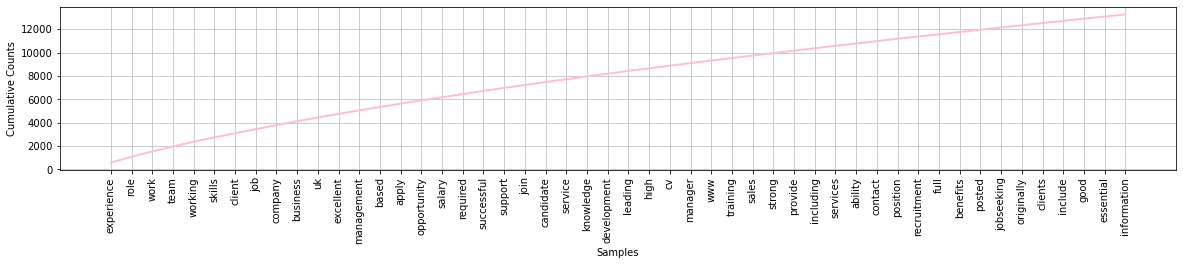

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [40]:
doc_fd.plot(50, cumulative=True, color='pink')

In [21]:
def removeMostFreqWords(description):
    return [w for w in description if w not in top50MostFreqWords]

tk_description = [removeMostFreqWords(description) for description in tk_description]

stats_print(tk_description)

Vocabulary size:  5218
Total number of tokens:  102975
Lexical diversity:  0.05067249332362224
Total number of description: 776
Average description length: 132.69974226804123
Maximum description length: 471
Minimum description length: 12
Standard deviation of description length: 70.3782402519735


### The Updated Statistics
In the above, we have done all required pre-processed steps, now let's have a look at the statistics again:

In [22]:
# # specify
# ignored_words = [w for w in stop_words if not ("not" in w or "n't" in w or "no" in w)]

# # filter out stop words
# tk_description = [[w for w in description if w not in ignored_words] \
#                       for description in tk_description]


print(f'The final statistic description after pre-processing:\n')
stats_print(tk_description)

The final statistic description after pre-processing:

Vocabulary size:  5218
Total number of tokens:  102975
Lexical diversity:  0.05067249332362224
Total number of description: 776
Average description length: 132.69974226804123
Maximum description length: 471
Minimum description length: 12
Standard deviation of description length: 70.3782402519735


**Recall, from the beginning, we have the following:**  
_____________________________________________

Vocabulary size:  9834

Total number of tokens:  186952

Lexical diversity:  0.052601737344345076

Total number of description: 776

Average description length: 240.91752577319588

Maximun description length: 815

Minimun description length: 13

Standard deviation of description length: 124.97750685071483
_____________________________________________

We've shrunk more than 40% of the vocabulary.

## Task 1.2.8 Save all job advertisement text and information in `.txt` files 
+ we will retrieve them. in task 2 and 3
+ Save the vocabulary, bigrams and job advertisment txt as per spectification.
+ We are going to store all the preprocessed description texts and its corresponding labels into files for task 2.
* all the tokenized description are stored in a .txt file named `description.txt`
    * each line is a description text, which contained all the tokens of the description text, separated by a space ' '
* all the corresponding labels are store in a .txt file named `category.txt`
    * each line is a label (one of these 4 values: 0,1,2,3)

In [23]:
# save description text
def save_description(descriptionFilename,tk_description):
    out_file = open(descriptionFilename, 'w') # creates a txt file and open to save the descriptions
    string = "\n".join([" ".join(description) for description in tk_description])
    out_file.write(string)
    out_file.close() # close the file

# save the category corresponding with the description text
def save_category(categoryFilename,category):
    out_file = open(categoryFilename, 'w') # creates a txt file and open to save category
    string = "\n".join([str(s) for s in category])
    out_file.write(string)
    out_file.close() # close the file

# save the title corresponding with the description text
def save_title(titleFilename,title):
    out_file = open(titleFilename, 'w') # creates a txt file and open to save title
    string = "\n".join([str(s) for s in title])
    out_file.write(string)
    out_file.close() # close the file

# save description into txt file
descriptionFilename = "description.txt"
save_description(descriptionFilename,tk_description)
print(f'Successfully saved description into {descriptionFilename}')

# save category into txt file
categoryFilename = "category.txt"
save_category(categoryFilename,category)
print(f'Successfully saved category into {categoryFilename}')

# save title into txt file
titleFilename = "title.txt"
save_title(titleFilename,title)
print(f'Successfully saved title into {titleFilename}')

Successfully saved description into description.txt
Successfully saved category into category.txt
Successfully saved title into title.txt


## Task 1.2.9 Build a vocabulary of the cleaned job advertisement descriptions

`vocab.txt`

This file contains the unigram vocabulary, one each line, in the following format: word_string:word_integer_index. Very importantly, words in the vocabulary must be sorted in alphabetical order, and the index value starts from 0. This file is the key to interpret the sparse encoding. For instance, in the following example, the word aaron is the test_index word (the corresponding integer_index as 19) in the vocabulary (note that the index values and words in the following image are artificial and used to demonstrate the required format only, it doesn't reflect the values of the actual expected output).

In the following, we also specify the format that we want the information to be displayed by specifying the formatting string:

`'%(word_string):%(word_integer_index)`. 

In [24]:
def write_vocab(vocab, filename):
    with open(filename, 'w') as f:
        for i, word in enumerate(vocab):
            f.write(word + ':' + str(i) + '\n')
            
# convert tokenized description into a alphabetically sorted list
vocab = sorted(list(set(chain.from_iterable(tk_description))))

# save the sorted vocabulary list into a file according to the required format
write_vocab(vocab, 'vocab.txt')

# print out the first 10 words in the vocabulary to test
print(vocab[:10])

['aap', 'aaron', 'aat', 'abb', 'abenefit', 'aberdeen', 'abi', 'abilities', 'ability', 'abreast']


In [25]:
# loop through the index of the target_names and print the category name
for i in range(len(df['target_names'])):
    print(f'Category at index {i}: {df["target_names"][i]}')

Category at index 0: Accounting_Finance
Category at index 1: Engineering
Category at index 2: Healthcare_Nursing
Category at index 3: Sales


In [26]:
# convert job ad to a dataframe
job_ad = pd.DataFrame({'Title': title, 'Webindex': webindex, 'Company': company, 'Description': description,'Tokenized Description': tk_description, 'Category': category})

# change Tokenized Description to string separated by space
# job_ad['Tokenized Description'] = job_ad['Tokenized Description'].apply(lambda x: ' '.join([str(i) for i in x]))
job_ad['Tokenized Description'] = job_ad['Tokenized Description']


# replace the value in Category column
job_ad['Category'] = job_ad['Category'].replace([0,1,2,3],['Accounting_Finance','Engineering','Healthcare_Nursing','Sales'])

# Cast Webindex to int
job_ad['Webindex'] = job_ad['Webindex'].astype(int)

# save job ad to csv file
job_ad.to_csv('job_ad.csv', index=False)

# print basic info about the job_ad data frame
print(job_ad.info())

# print first 3 rows
job_ad.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Title                  776 non-null    object
 1   Webindex               776 non-null    int64 
 2   Company                776 non-null    object
 3   Description            776 non-null    object
 4   Tokenized Description  776 non-null    object
 5   Category               776 non-null    object
dtypes: int64(1), object(5)
memory usage: 36.5+ KB
None


,Title,Webindex,Company,Description,Tokenized Description,Category
0,Finance / Accounts Asst Bromley to ****k,68997528,First Recruitment Services,Accountant (partqualified) to **** p.a. South ...,"[accountant, partqualified, south, east, londo...",Accounting_Finance
1,Fund Accountant Hedge Fund,68063513,Austin Andrew Ltd,One of the leading Hedge Funds in London is cu...,"[leading, hedge, funds, london, recruiting, fu...",Accounting_Finance
2,Deputy Home Manager,68700336,Caritas,An exciting opportunity has arisen to join an ...,"[exciting, opportunity, arisen, join, establis...",Healthcare_Nursing


### Convert all `.ipynb` notebooks in the same directory into `.py` files

In [27]:
# The .py format of the jupyter notebook
for fname in os.listdir():
    if fname.endswith('ipynb'):
        os.system(f'jupyter nbconvert {fname} --to python')

[NbConvertApp] Converting notebook task1.ipynb to python
[NbConvertApp] Writing 30608 bytes to task1.py
[NbConvertApp] Converting notebook task2_3.ipynb to python
[NbConvertApp] Writing 27718 bytes to task2_3.py
[NbConvertApp] Converting notebook model.ipynb to python
[NbConvertApp] Writing 32834 bytes to model.py


<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>1.3 Summary</strong></h3>

We have demonstrated the basic text pre-processing steps of sentence segmentation and tokenization. 
There are a couple of things that we should keep in mind:

* we have covered the fundamentals of text pre-processing steps of Case Normalization, Stop Word Removing, Stemming and Lemmatization. 

* As mentioned before, though these steps are doing very different things to the text we have, however, one common effect among them, is the reduction on the size of the vocabulary (the list of distinct words contained in the corpus). 

* How we should process the text depends on the downstream analysis. Before we do any pre-processing, we should decide on the scope of the text to be used in the downstream analysis task. For instance, should we use an entire document? Or should we break the document down into sections, paragraphs, or sentences. Take another example. If we are analysing emails, should we keep the headers information? or should we focus on the email body? Choosing the proper scope depends on the goals of the analysis task. For example, you might choose to use an entire document in document classification and clustering tasks while one might choose smaller units like paragraphs or sentences in document summarization and information retrieval tasks. The scope chosen will have an  impact on the steps needed in the pre-processing process.

* In this activity, we have shown you multiple ways to do tokenization. However, there is no single right way to do tokenization.  It completely depends on the corpus and the text analysis task you are going to perform. The major question of the tokenization phase is what counts as a token. In some of the text analysis task. Although word tokenization is relatively easy compared with other NLP or text mining task, errors made in this phase will propagate into later analysis and cause problems.

* Case Normalization is a very simple process to do, though it is indeed very effective. 
The above is a very simple example (consisting of a very short paragraph) and it might not show much reduction on the vocabulary size. Imagine if you have a large corpus, doing case normalization will significantly reduce the vocabulary size, and thus helps the analysis algorithms to focus on different meaning of tokens rather than its cases.

> # Discussion
>>In some of the text analysis tasks, we have to be mindful in the process of stopword removal. 
In some scenarios, stop words removal can wipe out relevant information and modify the context in a given sentence. 
For example, if we are performing a sentiment analysis, the word 'not', although is a stop word, it carries critical information, i.e. 'like' and 'not like' obviously are carrying completely reversed meaning.
We might fool out our algorithm off track if we remove a stop word like “not”. 
You should always carefully consider these conditions, design the list of "stop words" that are to removed based on your specific objectives.

>> we have build logistic regression models based our generated text features

<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>1.4 References</strong></h3>


+ [1] Sentence boundary disambiguation. https://en.wikipedia.org/wiki/Sentence_boundary_disambiguation
+ [2] Tokenization. https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html  
+ [3] Your Guide to Natural Language Processing (NLP). https://towardsdatascience.com/your-guide-to-natural-language-processing-nlp-48ea2511f6e1  
+ [4] Introduction to Natural Language Processing for Text. https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63  
+ [5] [Accessing Text Corpora and Lexical Resources](http://www.nltk.org/book/ch02.html): Chapter 2 of "Natural Language Processing with Python" By Steven Bird, Ewan Kelin & Edward Loper.  
+ [6]. [Corpus Readers](http://www.nltk.org/howto/corpus.html#tagged-corpora): An NLTK tutorial on accessing the contents of a diverse set of corpora.

+ [1] Stop words. https://en.wikipedia.org/wiki/Stop_word  
+ [3] Bird, Steven, Edward Loper and Ewan Klein (2009), [Natural Language Processing with Python](http://www.nltk.org/book/). O’Reilly Media Inc.  